In [46]:
from interpolate import *
import xarray as xr
path = "/Users/sookim/Desktop/ALBEDO/aibedo/scripts/data/ours/rsut_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"
ds = xr.open_dataset(path)
data = np.asarray(ds.rsut[0])
lon_list = list(np.asarray(ds.rsut[0].lon))
lat_list = list(np.asarray(ds.rsut[0].lat))

In [47]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 5, data, lon_list, lat_list)

number of vertices for level 5 (2**5)is 10242


In [48]:
print(len(interpolated_value))

10242


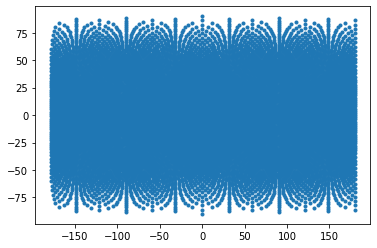

In [49]:
plt.scatter(lon, lat, marker='.')

(10242,) (10242,) (10242,)


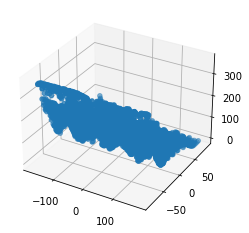

In [50]:
print(np.shape(lon), np.shape(lat), np.shape(interpolated_value ))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(lon, lat, interpolated_value )

In [51]:
import cartopy.crs as ccrs

def visualize_2d(x, longitude, latitude, export_path=None):
    """Visualize the data on a 2D map

    Args:
        x (numpy.array): numpy array with data the size of the longitude and latitude
        longitude (numpy.array): longitude coordinates
        latitude (numpy.array): latitude coordinates
        export_path (string): path and name for saving
    """

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines()

    plt.scatter(longitude, latitude, s=20, c=x, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    if export_path:
        plt.savefig(export_path)
        plt.clf()
        plt.cla()
        plt.close()

    else:
        plt.show()

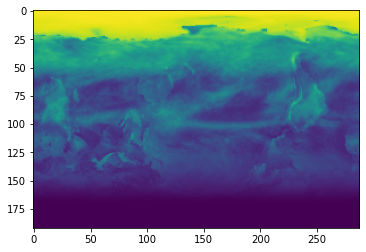

In [52]:
plt.imshow(data)

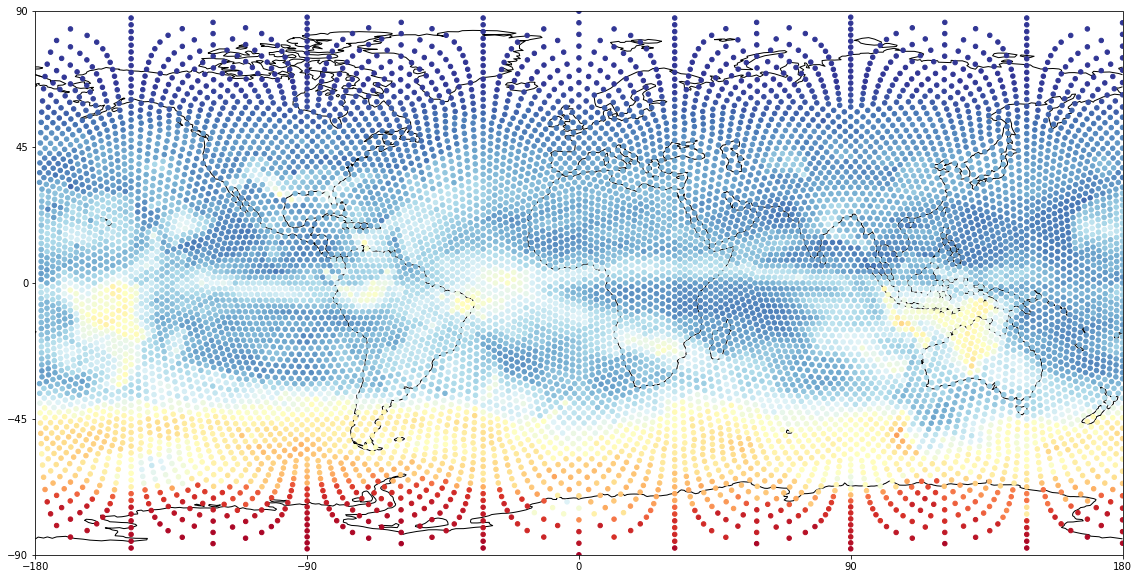

In [53]:
visualize_2d(interpolated_value, lon, lat)

In [54]:
lon, lat, interpolated_value = interpolate_SphereHealpix(32, 8, data, lon_list, lat_list)

number of vertices for sub-divsion 32 neighbor8 is 12288


In [55]:
print(len(lon), len(lat), len(interpolated_value))

12288 12288 12288


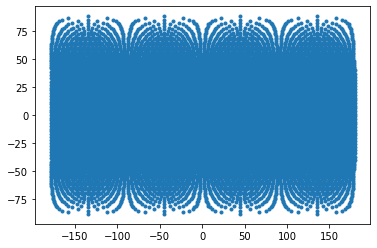

In [56]:
plt.scatter(lon, lat, marker='.')

(12288,) (12288,) (12288,)


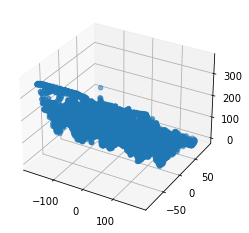

In [57]:
print(np.shape(lon), np.shape(lat), np.shape(interpolated_value ))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(lon, lat, interpolated_value )

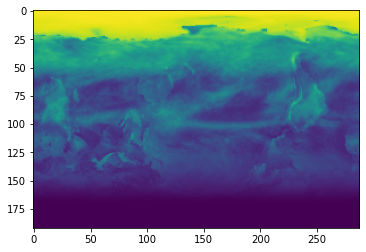

In [58]:
plt.imshow(data)

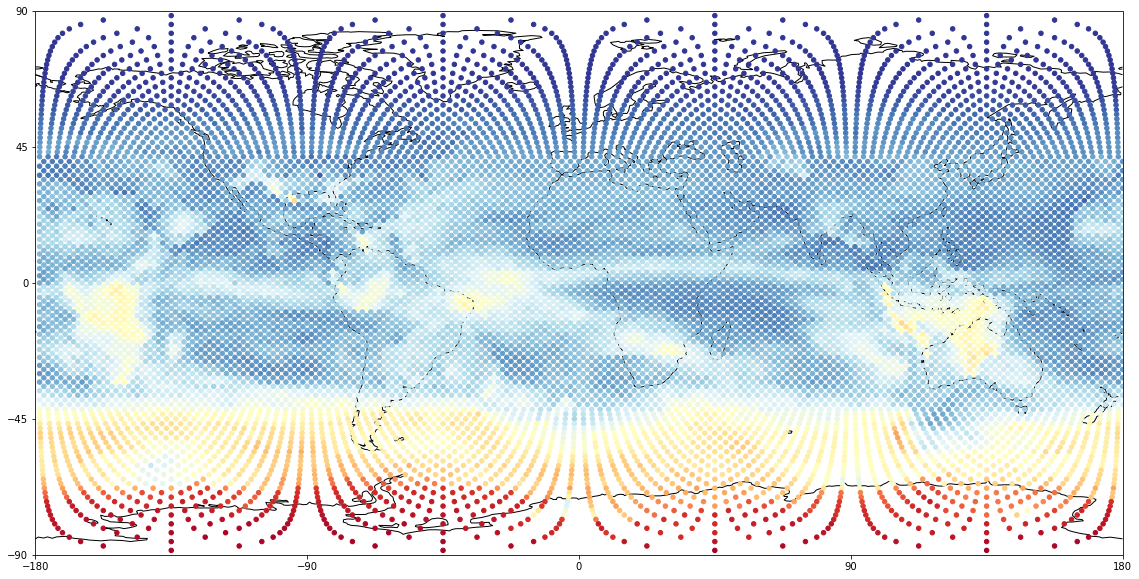

In [59]:
visualize_2d(interpolated_value, lon, lat)